# Satelliteguard

![Vodnjan Logo](assets/vodnjan-logo.png)

## Detekcija nekretnina i obrađenih površina

In [45]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import json
import numpy as np

model = YOLO(os.path.join("models", "satelliteguard-v8.pt"))

with open("coordinates.json", "r") as f:
    coords_dict = json.load(f)

def run_detection(image_name):
    image_path = os.path.join("sample_images", image_name)

    top_left = coords_dict[image_name]["top-left"]
    bottom_right = coords_dict[image_name]["bottom-right"]

    Tx, Ty = top_left
    Bx, By = bottom_right

    print("Koordinate slike:")
    print(f"Tx = {Tx}, Ty = {Ty}")
    print(f"Bx = {Bx}, By = {By}")

    pil_img = Image.open(image_path)
    img_width, img_height = pil_img.size

    # Convert to a NumPy BGR image for OpenCV drawing
    predicted_image_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    results = model(image_path, conf=0.4)

    house_index = 0
    land_index = 0

    for result in results:
        boxes = result.boxes.data
        for box in boxes:
            x1, y1, x2, y2, confidence, class_id = box.tolist()
            class_id = int(class_id)

            # Calculate center of the bounding box
            center_x_pix = (x1 + x2) / 2.0
            center_y_pix = (y1 + y2) / 2.0

            # Convert pixel coordinates to map coordinates (HTRS96/TM)
            center_x_map = Tx + (center_x_pix / img_width)  * (Bx - Tx)
            center_y_map = Ty + (center_y_pix / img_height) * (By - Ty)

            if class_id == 0:
                color = (0, 0, 255)
                label = str(house_index)
                house_index += 1
                print(f"Koordinate objekta {label}: ({center_x_map:.2f}, {center_y_map:.2f})")
            else:
                color = (255, 0, 0)
                label = f"{land_index}"
                land_index += 1
                print(f"Koordinate površine {label}: ({center_x_map:.2f}, {center_y_map:.2f})")

            # Draw dot
            cv2.circle(
                predicted_image_bgr,
                (int(center_x_pix), int(center_y_pix)),
                radius=5,
                color=color,
                thickness=-1
            )

            # Draw house number
            cv2.putText(
                predicted_image_bgr,
                label,
                (int(center_x_pix), int(center_y_pix) - 10), # slightly above the dot
                cv2.FONT_HERSHEY_SIMPLEX,
                1.0, # font scale
                color, # text color (Red)
                2, # line thickness
                cv2.LINE_AA
            )

    # Convert back to RGB for display
    predicted_image_rgb = cv2.cvtColor(predicted_image_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20, 10))
    plt.imshow(predicted_image_rgb)
    plt.axis('off')

    legend_patches = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="House"),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="Land"),
    ]
    plt.legend(handles=legend_patches, loc="upper left")

    plt.show()

Koordinate slike:
Tx = 291083.58, Ty = 4984222.26
Bx = 291564.66, By = 4983991.71

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_1.png: 320x640 24 houses, 177.6ms
Speed: 1.7ms preprocess, 177.6ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Koordinate objekta 0: (291348.87, 4984093.03)
Koordinate objekta 1: (291382.67, 4984003.70)
Koordinate objekta 2: (291413.10, 4984143.92)
Koordinate objekta 3: (291225.24, 4984187.67)
Koordinate objekta 4: (291347.71, 4984130.28)
Koordinate objekta 5: (291421.43, 4984033.39)
Koordinate objekta 6: (291365.55, 4984137.68)
Koordinate objekta 7: (291348.57, 4984085.29)
Koordinate objekta 8: (291358.92, 4984202.48)
Koordinate objekta 9: (291418.27, 4984065.94)
Koordinate objekta 10: (291366.28, 4984174.56)
Koordinate objekta 11: (291424.54, 4984012.57)
Koordinate objekta 12: (291405.56, 4984206.21)
Koordinate objekta 13: (291305.31, 4984211.64)
Koordinate objekta 14: (291341.29, 498415

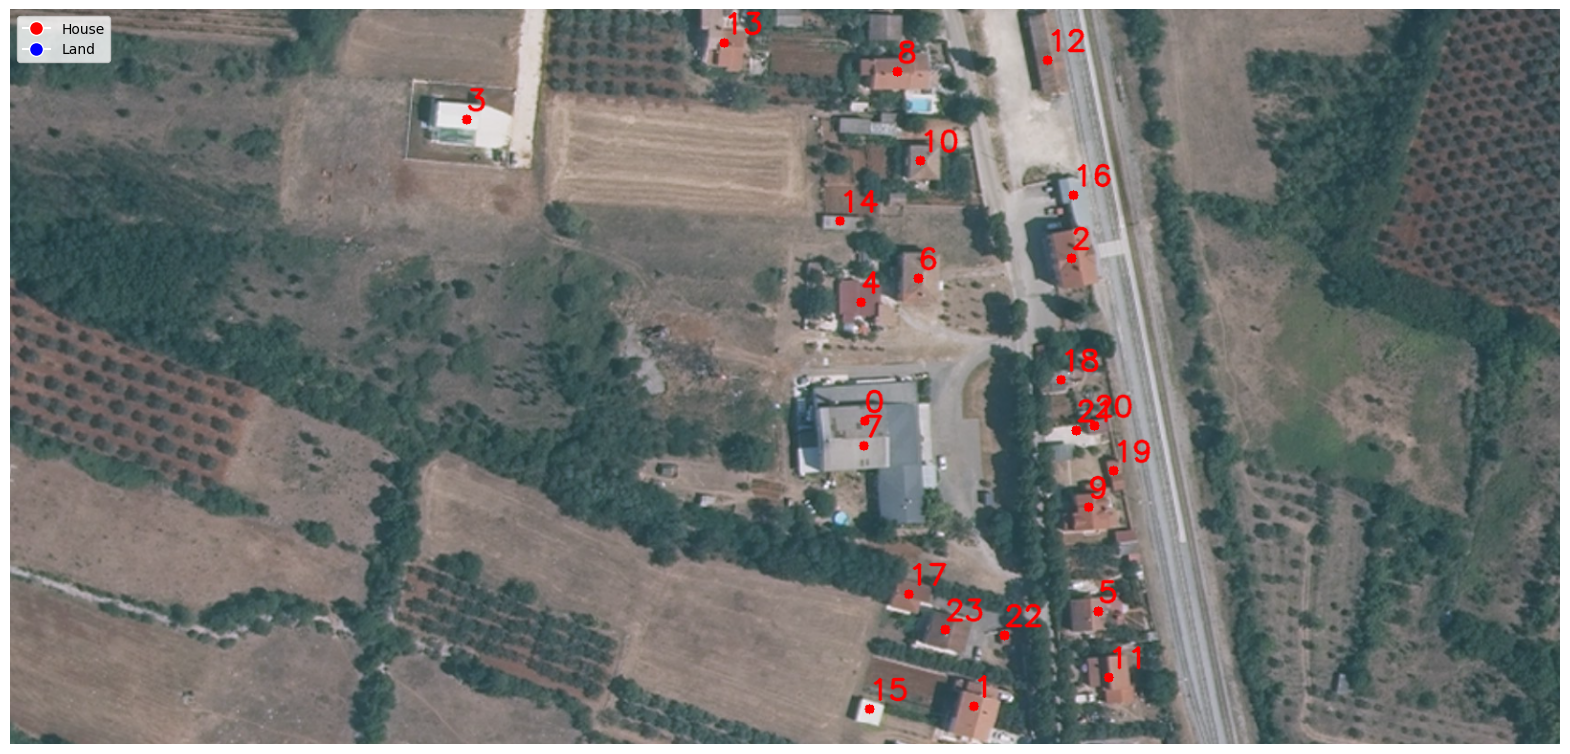

Koordinate slike:
Tx = 291451.17, Ty = 4984002.59
Bx = 291938.51, By = 4983769.36

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_2.png: 320x640 25 houses, 196.8ms
Speed: 2.4ms preprocess, 196.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
Koordinate objekta 0: (291874.54, 4983800.85)
Koordinate objekta 1: (291590.30, 4983832.24)
Koordinate objekta 2: (291677.90, 4983779.77)
Koordinate objekta 3: (291931.76, 4983805.15)
Koordinate objekta 4: (291569.06, 4983791.43)
Koordinate objekta 5: (291458.36, 4983937.52)
Koordinate objekta 6: (291536.97, 4983785.67)
Koordinate objekta 7: (291912.05, 4983809.68)
Koordinate objekta 8: (291785.79, 4983808.97)
Koordinate objekta 9: (291699.74, 4983811.79)
Koordinate objekta 10: (291633.19, 4983847.57)
Koordinate objekta 11: (291676.08, 4983799.27)
Koordinate objekta 12: (291637.84, 4983832.61)
Koordinate objekta 13: (291710.65, 4983789.49)
Koordinate objekta 14: (291653.89, 498386

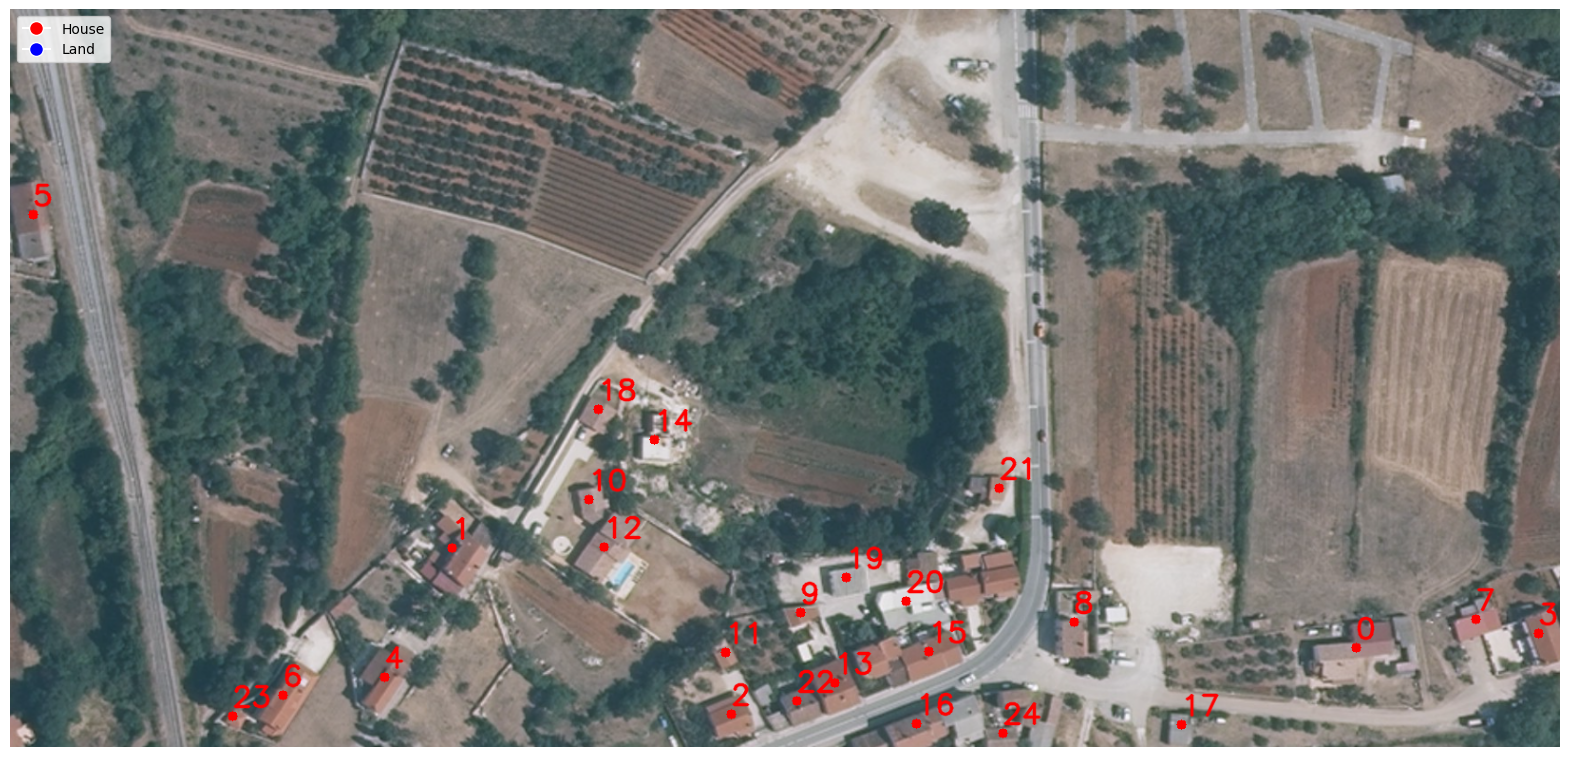

Koordinate slike:
Tx = 291299.51, Ty = 4983468.81
Bx = 291786.84, By = 4983235.88

image 1/1 c:\Users\josip\Documents\GitHub\edih-adria\vodnjan-satelliteguard\sample_images\slika_3.png: 320x640 29 houses, 1 land, 187.6ms
Speed: 1.3ms preprocess, 187.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
Koordinate površine 0: (291711.18, 4983409.42)
Koordinate objekta 0: (291401.72, 4983443.39)
Koordinate objekta 1: (291461.41, 4983266.51)
Koordinate objekta 2: (291563.68, 4983357.58)
Koordinate objekta 3: (291485.79, 4983331.63)
Koordinate objekta 4: (291519.78, 4983310.95)
Koordinate objekta 5: (291330.34, 4983306.98)
Koordinate objekta 6: (291435.29, 4983323.11)
Koordinate objekta 7: (291604.46, 4983246.39)
Koordinate objekta 8: (291373.14, 4983338.32)
Koordinate objekta 9: (291483.12, 4983301.82)
Koordinate objekta 10: (291460.66, 4983305.02)
Koordinate objekta 11: (291543.33, 4983303.36)
Koordinate objekta 12: (291397.58, 4983285.71)
Koordinate objekta 13: (291415.74

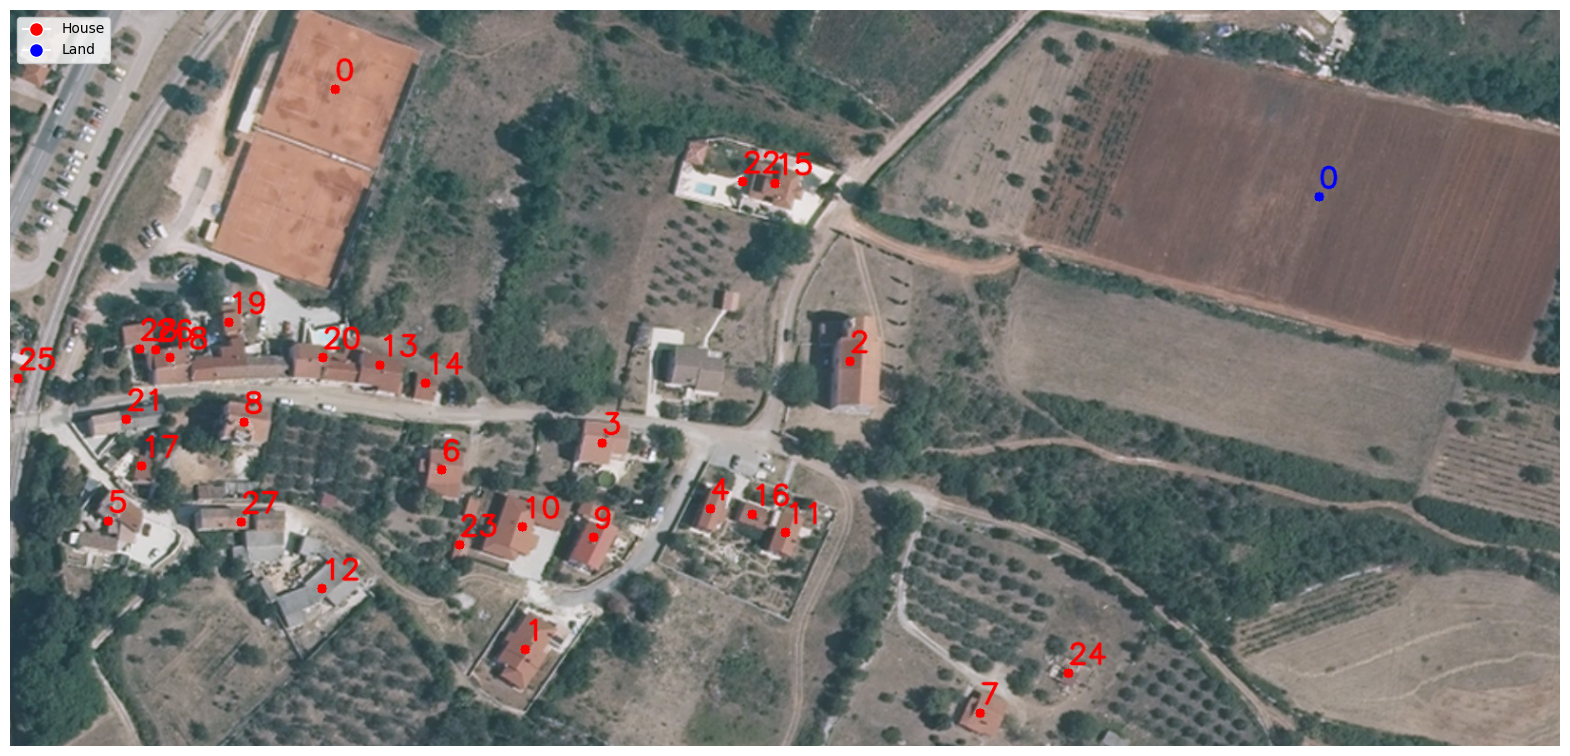

In [46]:
run_detection("slika_1.png")
run_detection("slika_2.png")
run_detection("slika_3.png")

## Detekcija deponija otpada

In [98]:
import os
from google import genai
from google.genai import types
from dotenv import load_dotenv
from io import BytesIO

load_dotenv()

def detect_dumpsite(image_path):
    im = Image.open(BytesIO(open(image_path, "rb").read()))

    plt.figure(figsize=(8, 8))
    plt.imshow(im)
    plt.axis("off")
    plt.show()

    client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

    PROMPT = "Does this image contain an illegal dumpsite?"

    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=types.GenerateContentConfig(
            system_instruction="Return a JSON object with the key 'result' and a boolean value true or false.",
            temperature=0.1,
            response_mime_type="application/json"
        ),
        contents=[PROMPT, im])

    return json.loads(response.text)["result"]

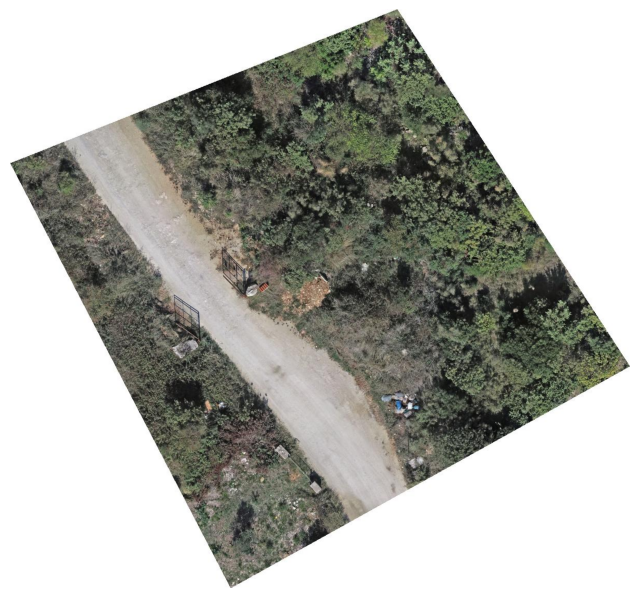

True

In [99]:
detect_dumpsite(os.path.join("sample_images", "vodnjan_kamenolom.jpg"))

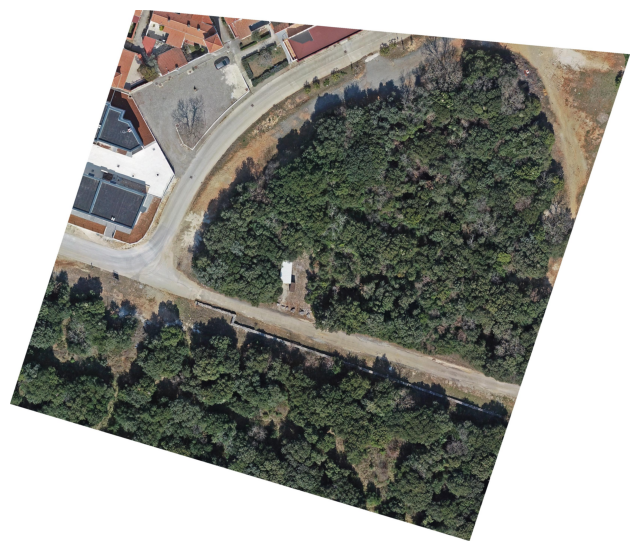

False

In [100]:
detect_dumpsite(os.path.join("sample_images", "barbariga.jpg"))